# 🧾 Explanation on Confussion Matrix, Precission, Recall, and F1 Scores using Insurance Claim Classification with Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic insurance data
np.random.seed(42)
n = 200
ages = np.random.randint(18, 65, size=n)
sexes = np.random.choice(['male', 'female'], size=n)
smokers = np.random.choice(['yes', 'no'], size=n, p=[0.3, 0.7])
bmis = np.round(np.random.normal(27, 4, size=n), 1)
sports = np.random.choice(['yes', 'no'], size=n, p=[0.4, 0.6])

claim = []
for i in range(n):
    prob = 0.1
    if ages[i] > 45: prob += 0.2
    if smokers[i] == 'yes': prob += 0.25
    if bmis[i] > 30: prob += 0.2
    if sports[i] == 'no': prob += 0.15
    claim.append(np.random.rand() < prob)

df = pd.DataFrame({
    'Age': ages,
    'Sex': sexes,
    'Smoker': smokers,
    'BMI': bmis,
    'Sport': sports,
    'Claim': np.array(claim).astype(int)
})

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Smoker'] = le.fit_transform(df['Smoker'])
df['Sport'] = le.fit_transform(df['Sport'])
df.head()

,Age,Sex,Smoker,BMI,Sport,Claim
0,56,0,0,31.6,1,0
1,46,1,0,25.1,1,0
2,32,0,0,24.3,0,0
3,60,1,1,32.4,1,0
4,25,1,0,18.9,0,0


In [2]:
X = df[['Age', 'Sex', 'Smoker', 'BMI', 'Sport']]
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

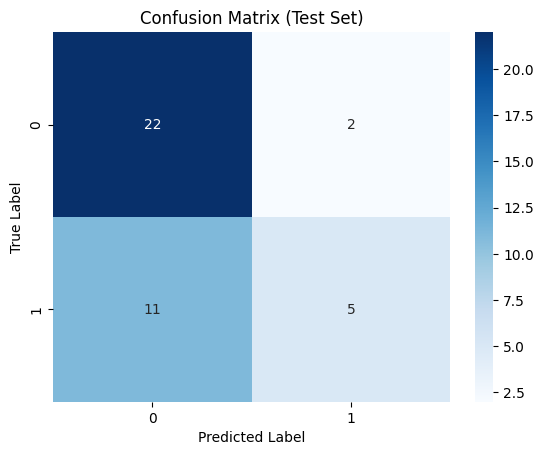

In [3]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [4]:
report = classification_report(y_test, y_pred_test, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.666667,0.916667,0.771930,24.000
1,0.714286,0.312500,0.434783,16.000
accuracy,0.675000,0.675000,0.675000,0.675
macro avg,0.690476,0.614583,0.603356,40.000
weighted avg,0.685714,0.675000,0.637071,40.000



## 📊 Confusion Matrix Recap

|                      | Actual: No Claim (0) | Actual: Claim (1) |
|----------------------|----------------------|--------------------|
| **Predicted: No**    | 22 (✅ True Negative) | 11 (❌ False Negative) |
| **Predicted: Yes**   | 2 (❌ False Positive) | 5 (✅ True Positive) |

---

## 📈 Metrics and Real-World Analogies

### ✅ 1. Accuracy – “Overall Score”
- **Definition:** How many predictions the model got correct out of all.
- **Analogy:** Like your exam score. You might say “I got 67.5 out of 100,” but that doesn’t mean you answered the important questions correctly.
- **Issue:** In imbalanced data (e.g., 90% of people don’t file a claim), the model might appear accurate without being truly intelligent.
- **In our case:** Accuracy = 67.5% → A decent score, but not reliable when the goal is to catch actual claims.

---

### 🎯 2. Precision – “How confident are you before accusing someone?”
- **Definition:** Out of all predictions marked as **claim**, how many were actually correct?
- **Analogy:** You’re a police officer. Of all the people you arrest for theft, how many were actual thieves?
- **In our case:** Precision = 71.4% → When the model predicts a claim, it’s mostly correct.

---

### 🔍 3. Recall / Sensitivity – “How good are you at catching the real targets?”
- **Definition:** Out of all actual claims, how many did the model detect?
- **Analogy:** You’re hunting criminals. How many of the real criminals did you actually catch?
- **In our case:** Recall = 31.3% → Most true claims are being missed.

---

### 🧘‍♂️ 4. Specificity – “How paranoid are you?”
- **Definition:** Out of all actual non-claims, how many did the model correctly identify as such?
- **Analogy:** Don’t go arresting people randomly. You protect your reputation when you rarely accuse the innocent.
- **In our case:** Specificity = 91.7%

---

### ⚖️ 5. F1 Score – “The Ideal Relationship Balance”
- **Definition:** The harmonic mean of precision and recall. It balances both when you can’t just optimize for one.
- **Analogy:**
  - **Precision:** Of all the people you confessed your love to, how many actually liked you back?
  - **Recall:** Of all the people who liked you, how many did you actually confess to?
- **In our case:** F1 Score = 43.5% → Some precision, but too many missed positives.

---

## 💡 Real-World Takeaway
In the insurance domain, missing a real claim (False Negative) is more damaging than predicting a false claim (False Positive). That means **recall** is more critical than just playing it safe with **precision**.

> F1 Score becomes an essential metric because it helps you maintain a balance — not being too risky (low precision), and not missing too many valid claims (low recall).
